This notbook is for capstone project

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
print('imported')

imported


In [2]:
file_name='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv(file_name)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.columns.values 

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
df.shape

(194673, 38)

In [7]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts()) 
    print("")  
#"True" stands for missing value, while "False" stands for not missing value.

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [8]:
df.drop(["SPEEDING","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNDESC","INTKEY",'EXCEPTRSNCODE','SEVERITYCODE.1'], axis=1, inplace=True)

In [9]:
df.shape

(194673, 31)

In [ ]:
#What feature do we have?

In [10]:
for feature in ['ADDRTYPE','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE']:
    print(df[feature].unique())

['Intersection' 'Block' 'Alley' nan]
[2 1]
['Injury Collision' 'Property Damage Only Collision']
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']


In [11]:
df['SEVERITYCODE'].value_counts().to_frame()
#df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


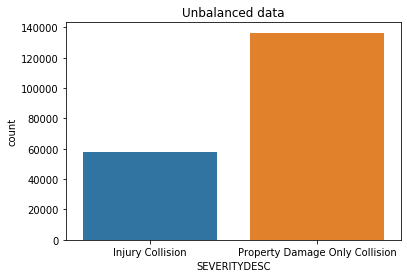

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('SEVERITYDESC', data=df)
plt.title('Unbalanced data')


plt.savefig('severity1.png', bbox_inches='tight')
plt.show()

In [13]:
#balanced data
from sklearn.utils import resample
df_max=df[df.SEVERITYCODE== 1]
df_min=df[df.SEVERITYCODE== 2]
df_max_resample= resample(df_max,replace=False, n_samples=58188)

df_b = pd.concat([df_min ,df_max_resample ])
df_b['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,58188
1,58188


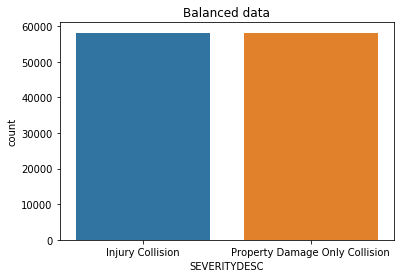

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 


sns.countplot('SEVERITYDESC', data=df_b)

plt.title('Balanced data')
plt.savefig('severity2.png', bbox_inches='tight')
plt.show()

In [15]:
df['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,126926
Intersection,65070
Alley,751


In [16]:
df['JUNCTIONTYPE'].value_counts().to_frame()

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [17]:
df['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [ ]:
df1 = df[['COLLISIONTYPE','PERSONCOUNT']]
df_collision= df1.groupby('COLLISIONTYPE', axis=0).sum().astype(int)
print(df_collision)

In [ ]:
df['WEATHER'].value_counts().to_frame()

In [ ]:
df['ROADCOND'].value_counts().to_frame()

In [ ]:
df['LIGHTCOND'].value_counts().to_frame()

In [ ]:
df['UNDERINFL'].value_counts().to_frame()

In [ ]:
df['HITPARKEDCAR'].value_counts().to_frame()

In [ ]:
df['SDOT_COLCODE'].value_counts().to_frame()